In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Part 2

In [6]:
# Load datasets (adjust file paths as necessary)
df_old = pd.read_csv("../data/sf_crime_2003_2018.csv", parse_dates=['Date'])
df_new = pd.read_csv("../data/sf_crime_data_2018_present.csv", parse_dates=['Incident Date'])



In [7]:
# Filter out incomplete years:
# For the older dataset, remove data from 2018 because it’s not complete.
df_old['Year'] = pd.to_datetime(df_old['Date']).dt.year
df_old = df_old[df_old['Year'] < 2018]
df_old

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,Year
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,2004-11-22,17:50,INGLESIDE,NONE,GENEVA AV / SANTOS ST,-122.420084,37.708311,POINT (-122.420084075249 37.7083109744362),2004
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,2005-10-18,20:00,PARK,NONE,TURK ST / STJOSEPHS AV,-120.500000,90.000000,POINT (-120.50000000000001 90),2005
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,2004-02-15,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.500000,90.000000,POINT (-120.50000000000001 90),2004
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,2011-02-18,05:27,INGLESIDE,NONE,0 Block of SANJUAN AV,-122.436220,37.724377,POINT (-122.43622001281001 37.7243766140428),2011
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,2010-11-21,17:00,SOUTHERN,NONE,400 Block of 10TH ST,-122.410541,37.770913,POINT (-122.410541166987 37.7709130566165),2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129520,17050730416710,170507304,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Thursday,2017-06-22,01:42,CENTRAL,"ARREST, CITED",BROADWAY ST / DAVIS ST,-122.398699,37.798880,POINT (-122.39869911640743 37.798880026259866),2017
2129521,17071435504014,170714355,4014,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,2017-09-01,17:00,PARK,NONE,HAIGHT ST / BUENAVISTAWEST AV,-122.443312,37.770470,POINT (-122.44331194960198 37.77046975485389),2017
2129522,17053348465010,170533484,65010,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Friday,2017-06-30,17:50,BAYVIEW,"ARREST, BOOKED",ILLINOIS ST / 23RD ST,-122.387068,37.755446,POINT (-122.38706797754722 37.75544602661817),2017
2129523,17102776330130,171027763,30130,OTHER OFFENSES,PEDDLING WITHOUT A LICENSE,Wednesday,2017-12-20,15:41,SOUTHERN,"ARREST, BOOKED",7TH ST / MARKET ST,-122.412515,37.780478,POINT (-122.41251534135559 37.78047774805081),2017


In [8]:
# For the newer dataset, assume we know that 2018 is a complete year:
df_new['Year'] = pd.to_datetime(df_new['Incident Date']).dt.year
df_new = df_new[df_new['Year'] >= 2018]  # Modify if additional complete years exist
df_new


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts,Year
0,2023/03/01 05:02:00 AM,2023-03-01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
1,2023/03/13 10:59:00 AM,2023-03-13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551,230174885,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
2,2023/03/14 06:44:00 PM,2023-03-14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
3,2023/02/15 03:00:00 AM,2023-02-15,03:00,2023,Wednesday,2023/03/11 04:55:00 PM,125378606372,1253786,236046123,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
4,2023/03/13 11:26:00 AM,2023-03-13,11:26,2023,Monday,2023/03/13 01:37:00 PM,125419506244,1254195,236046850,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929548,2025/02/05 07:38:00 AM,2025-02-05,07:38,2025,Wednesday,2025/02/05 04:40:00 PM,145975375000,1459753,250070382,250362077.0,...,POINT (-122.41043090820312 37.78995132446289),19.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0,2025
929549,2025/02/05 03:20:00 AM,2025-02-05,03:20,2025,Wednesday,2025/02/05 03:30:00 PM,145971628150,1459716,250070100,250362176.0,...,POINT (-122.41827392578125 37.76190185546875),53.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0,2025
929550,2025/02/05 07:37:00 AM,2025-02-05,07:37,2025,Wednesday,2025/02/05 07:37:00 AM,145961927199,1459619,250069181,250360581.0,...,POINT (-122.44092559814453 37.77363586425781),24.0,NaN,NaN,NaN,NaN,NaN,11.0,7.0,2025
929551,2025/02/03 06:00:00 PM,2025-02-03,18:00,2025,Monday,2025/02/04 02:10:00 PM,145950228100,1459502,250068149,250351510.0,...,POINT (-122.40583038330078 37.76847457885742),33.0,NaN,NaN,NaN,2.0,NaN,9.0,3.0,2025


In [9]:
# Standardize column names for crime category and date/time:
df_old = df_old.rename(columns={'Category': 'Crime_Category', 'Date': 'Crime_Date'})
df_new = df_new.rename(columns={'Incident Category': 'Crime_Category', 'Incident Date': 'Crime_Date', 
                                'Incident Time': 'Time', 'Current Police Districts': 'PdDistrict',
                                'Longitude': 'X', 'Latitude': 'Y'})

In [10]:
# Keep only the necessary columns (example: date, crime category, time, district, and coordinates)
df_old = df_old[['Crime_Date', 'Crime_Category', 'Time', 'PdDistrict', 'X', 'Y']]
df_new = df_new[['Crime_Date', 'Crime_Category', 'Time', 'PdDistrict', 'X', 'Y']]

In [11]:
# Combine the datasets
df = pd.concat([df_old, df_new], ignore_index=True)
df


,Crime_Date,Crime_Category,Time,PdDistrict,X,Y
0,2004-11-22,ROBBERY,17:50,INGLESIDE,-122.420084,37.708311
1,2005-10-18,VEHICLE THEFT,20:00,PARK,-120.500000,90.000000
2,2004-02-15,VEHICLE THEFT,02:00,SOUTHERN,-120.500000,90.000000
3,2011-02-18,ARSON,05:27,INGLESIDE,-122.436220,37.724377
4,2010-11-21,ASSAULT,17:00,SOUTHERN,-122.410541,37.770913
...,...,...,...,...,...,...
3014014,2025-02-05,Missing Person,07:38,6.0,-122.410431,37.789951
3014015,2025-02-05,Malicious Mischief,03:20,3.0,-122.418274,37.761902
3014016,2025-02-05,Other Miscellaneous,07:37,7.0,-122.440926,37.773636
3014017,2025-02-03,Malicious Mischief,18:00,3.0,-122.405830,37.768475


In [12]:
# Generate statistics:
total_crimes = len(df)
unique_categories = df['Crime_Category'].unique()
category_counts = df['Crime_Category'].value_counts()

print("Total number of crimes:", total_crimes)
print("Unique crime categories (", len(unique_categories), "):", unique_categories)
print("Crime counts by category:")
print(category_counts)

Total number of crimes: 3014019
Unique crime categories ( 87 ): ['ROBBERY' 'VEHICLE THEFT' 'ARSON' 'ASSAULT' 'TRESPASS' 'BURGLARY'
 'LARCENY/THEFT' 'WARRANTS' 'OTHER OFFENSES' 'DRUG/NARCOTIC'
 'SUSPICIOUS OCC' 'LIQUOR LAWS' 'VANDALISM' 'WEAPON LAWS' 'NON-CRIMINAL'
 'MISSING PERSON' 'FRAUD' 'SEX OFFENSES, FORCIBLE' 'SECONDARY CODES'
 'DISORDERLY CONDUCT' 'RECOVERED VEHICLE' 'KIDNAPPING'
 'FORGERY/COUNTERFEITING' 'PROSTITUTION' 'DRUNKENNESS' 'BAD CHECKS'
 'DRIVING UNDER THE INFLUENCE' 'LOITERING' 'STOLEN PROPERTY' 'SUICIDE'
 'BRIBERY' 'EXTORTION' 'EMBEZZLEMENT' 'GAMBLING' 'PORNOGRAPHY/OBSCENE MAT'
 'SEX OFFENSES, NON FORCIBLE' 'TREA' 'Larceny Theft' 'Recovered Vehicle'
 'Lost Property' 'Drug Violation' 'Assault' 'Malicious Mischief'
 'Non-Criminal' 'Fraud' 'Warrant' 'Other Offenses' 'Robbery'
 'Case Closure' 'Stolen Property' 'Other Miscellaneous' 'Other'
 'Traffic Collision' 'Suspicious Occ' 'Disorderly Conduct'
 'Weapons Carrying Etc' 'Rape' 'Drug Offense' 'Missing Person'
 'Motor Vehi

## PART 2 EX 2

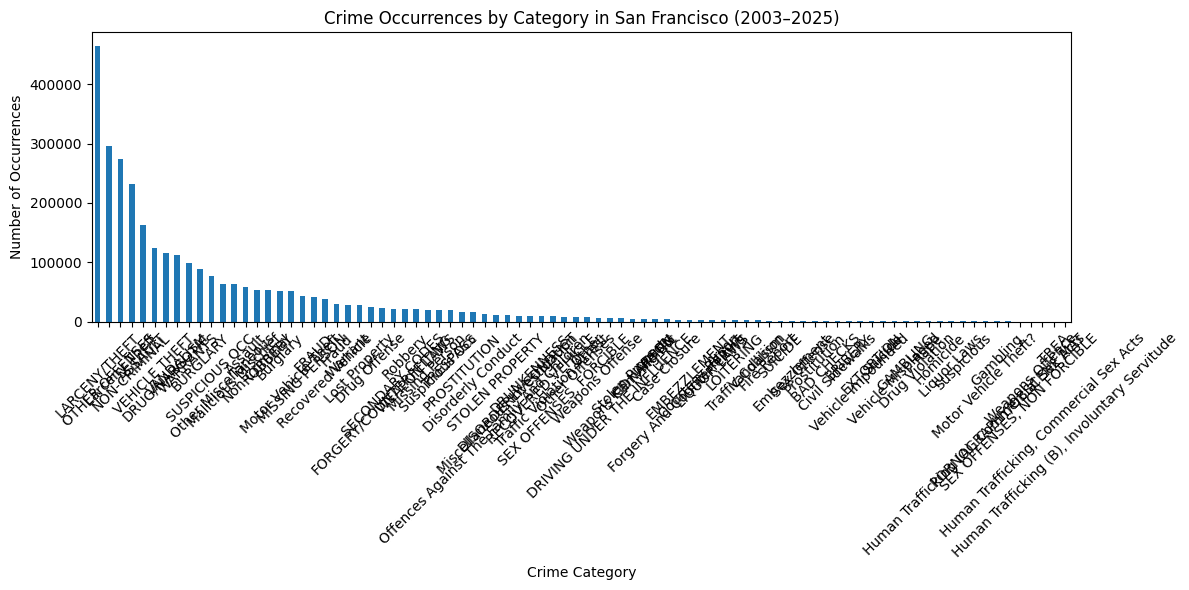

In [13]:
# Assume df is your cleaned dataframe with a column 'Crime_Category'
crime_counts = df['Crime_Category'].value_counts()

plt.figure(figsize=(12,6))
crime_counts.plot(kind='bar')
plt.xlabel("Crime Category")
plt.ylabel("Number of Occurrences")
plt.title("Crime Occurrences by Category in San Francisco (2003–2025)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## PART 2 EX 3

In [14]:
# Assume df is your merged, cleaned dataframe with a column named 'Crime_Date'
# Ensure the date is in datetime format and extract the year.
df['Crime_Date'] = pd.to_datetime(df['Crime_Date'])
df['Year'] = df['Crime_Date'].dt.year

# Count the crimes per year
year_counts = df['Year'].value_counts().sort_index()

# Identify the year with the most and the fewest crimes
most_crimes_year = year_counts.idxmax()    # Year with maximum crime count
fewest_crimes_year = year_counts.idxmin()    # Year with minimum crime count

print("Year with the most crimes:", most_crimes_year)
print("Year with the fewest crimes:", fewest_crimes_year)

Year with the most crimes: 2018
Year with the fewest crimes: 2025


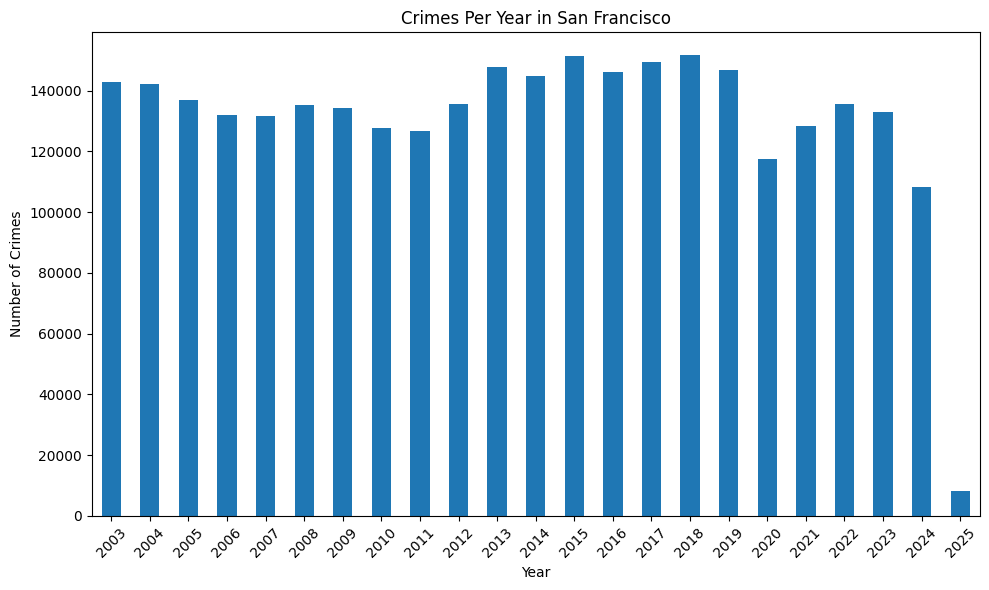

In [15]:
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Crimes Per Year in San Francisco")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

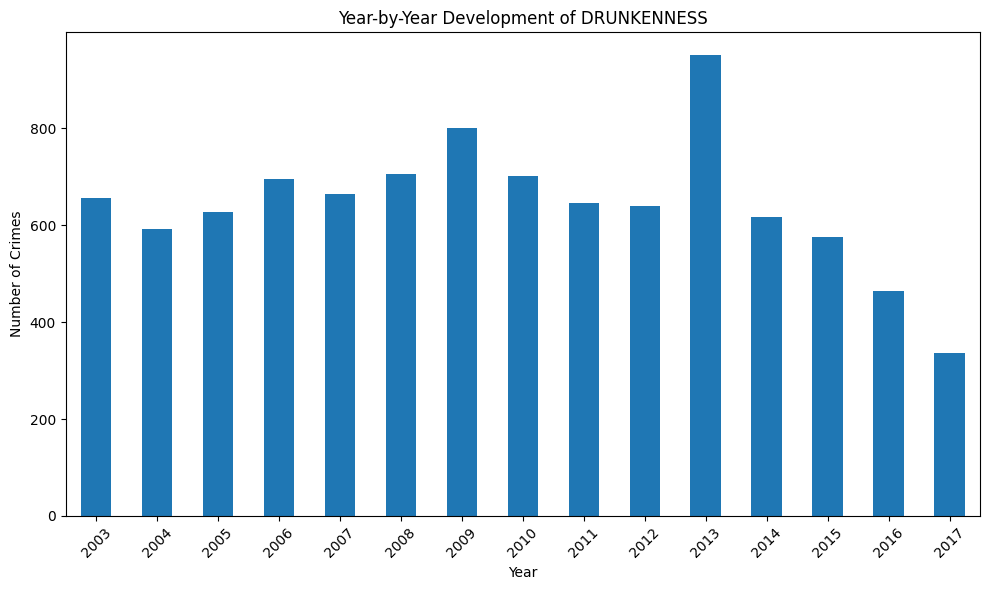

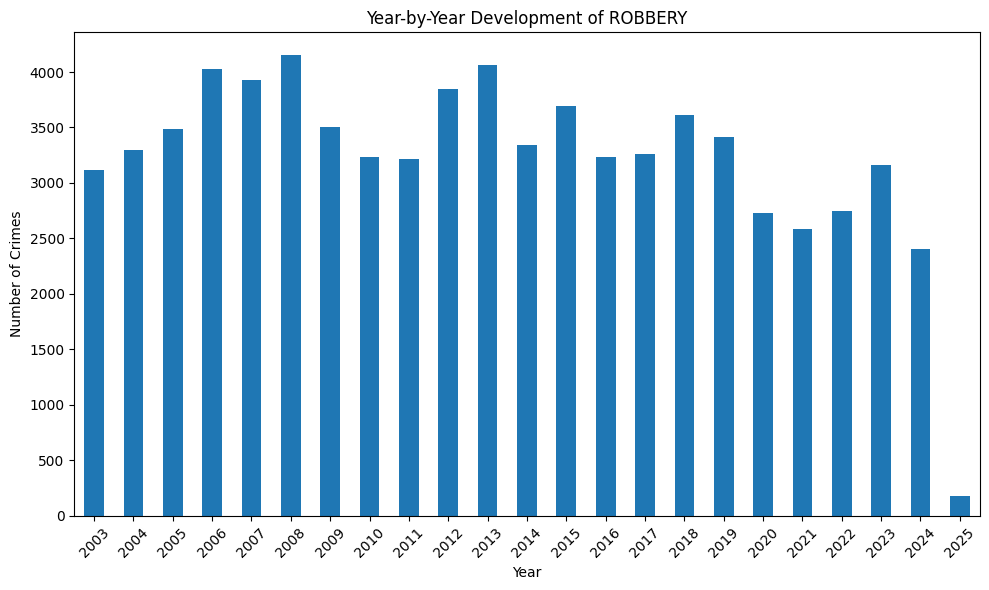

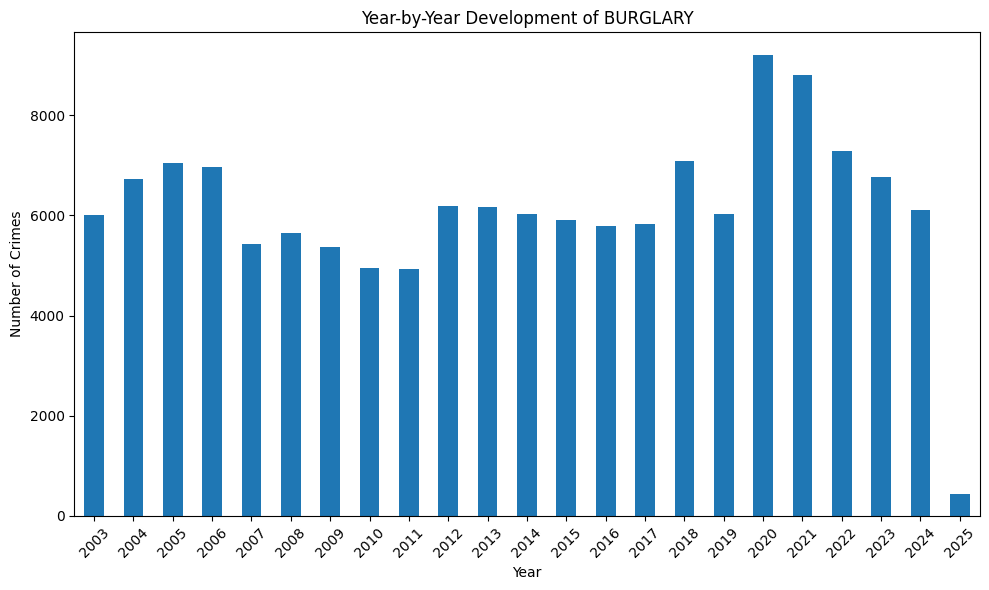

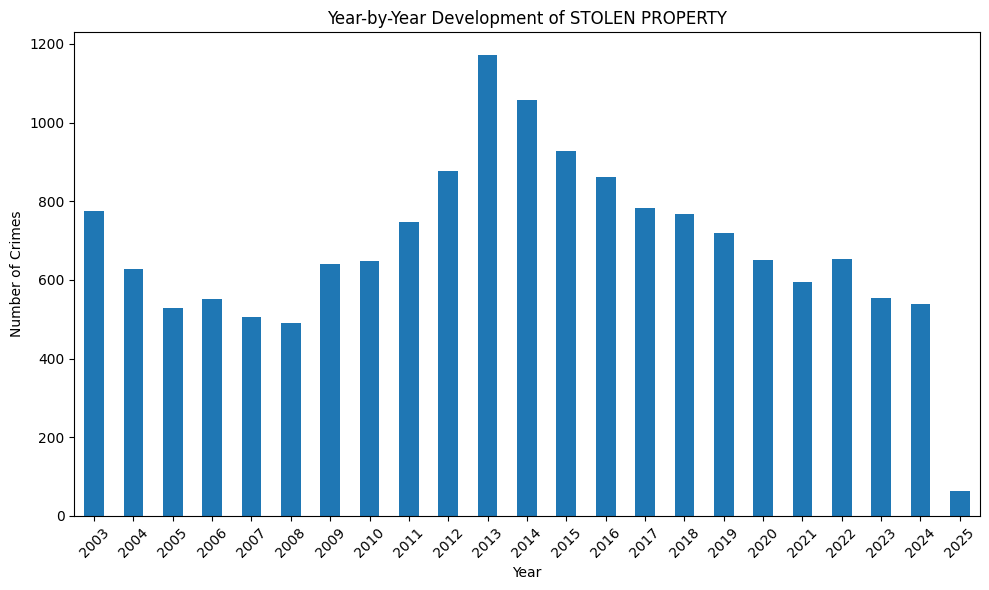

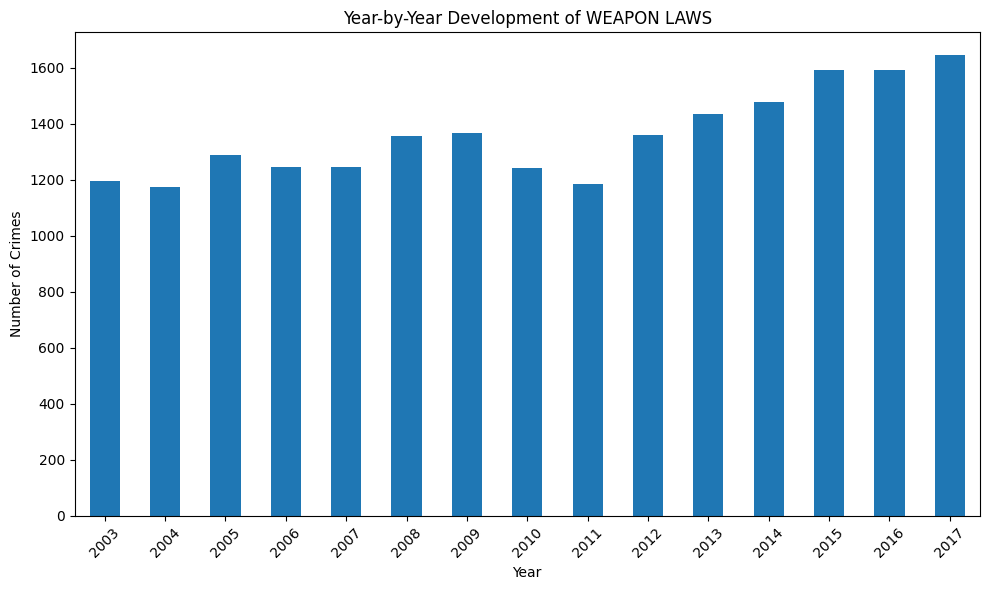

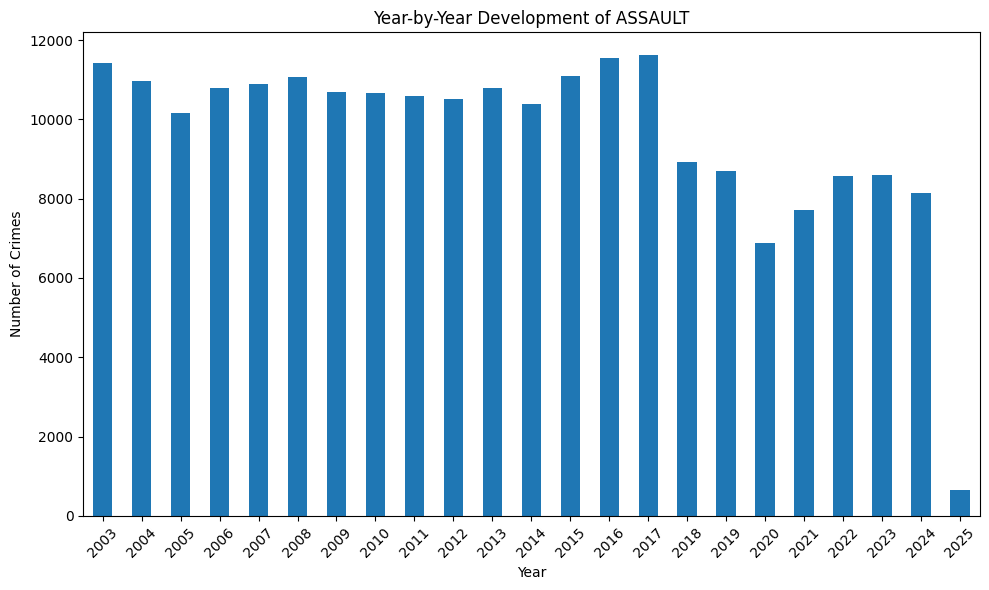

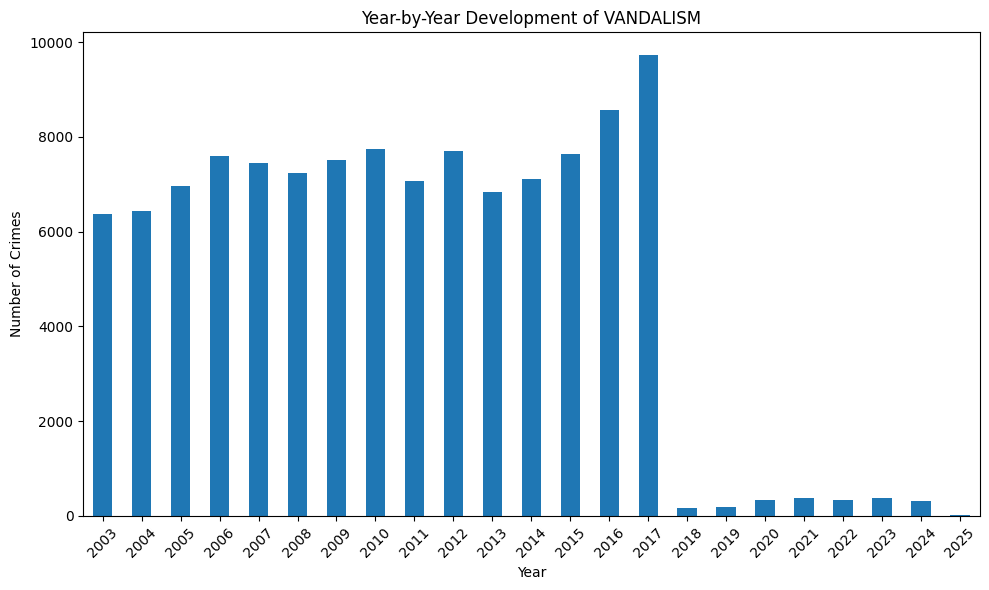

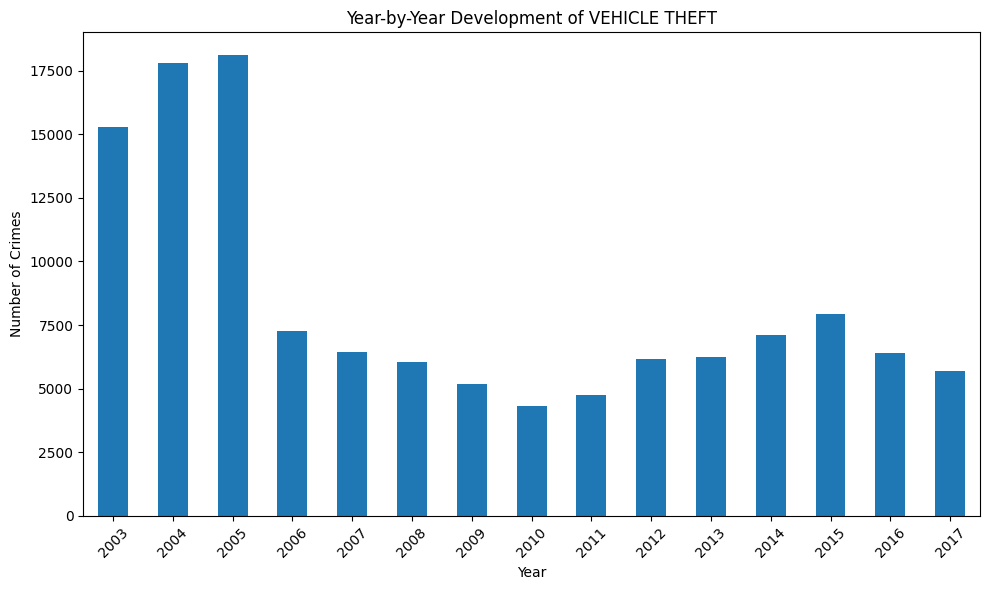

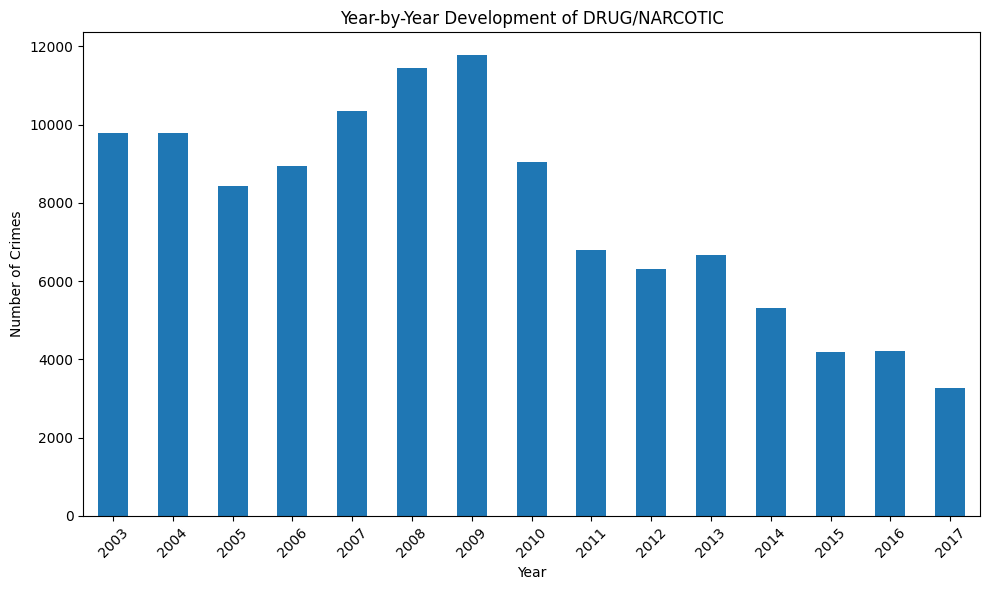

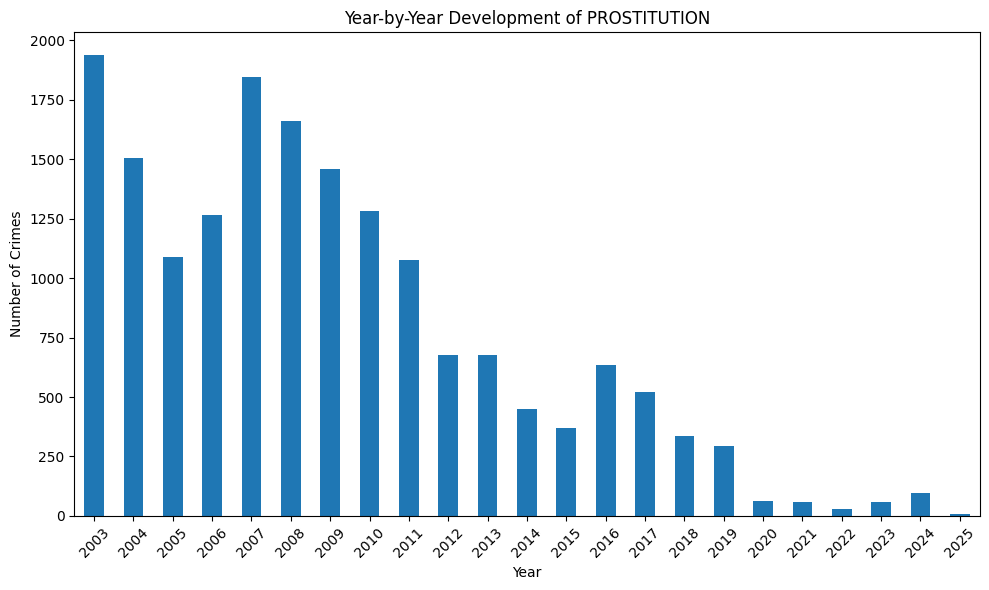

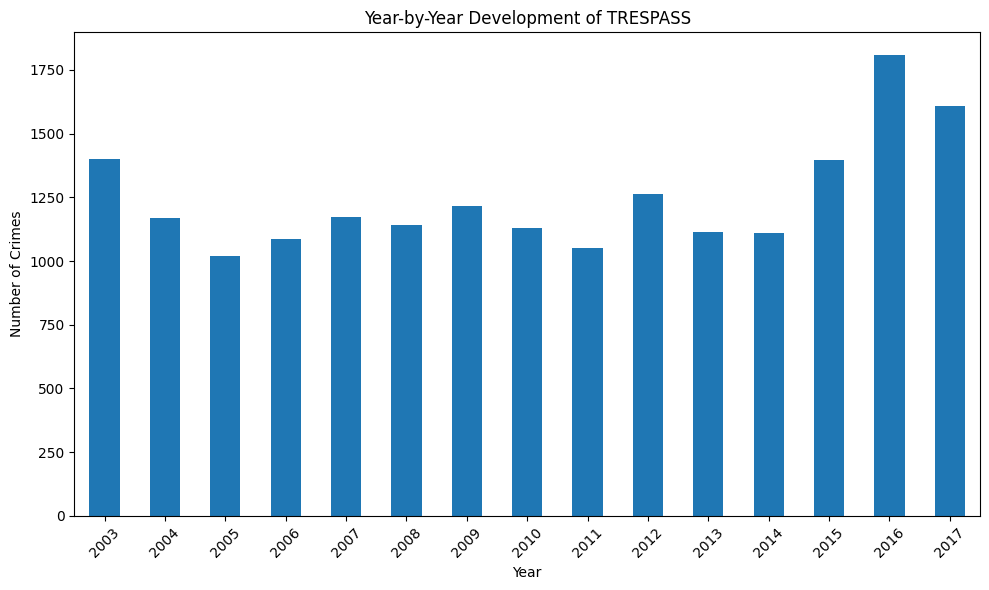

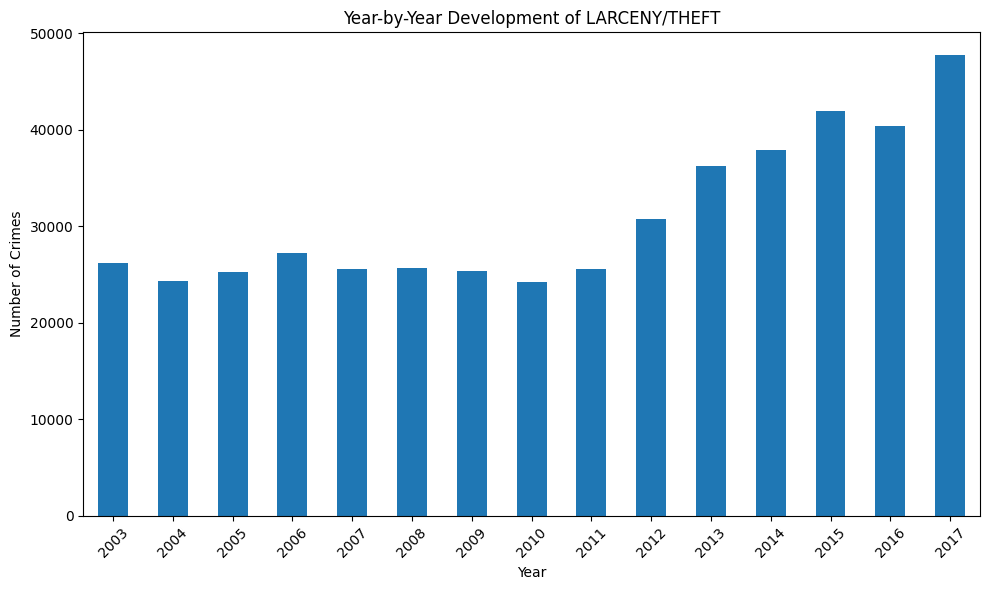

In [ ]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])


# Optional: Standardize crime category names
df['Crime_Category'] = df['Crime_Category'].str.upper()

for crime in focuscrimes:
    # Filter dataset for the current focus crime
    crime_df = df[df['Crime_Category'] == crime]
    
    # Count crimes per year for this category
    crime_year_counts = crime_df['Year'].value_counts().sort_index()
    
    # Plotting the year-by-year development for the focus crime
    plt.figure(figsize=(10, 6))
    crime_year_counts.plot(kind='bar')
    plt.xlabel("Year")
    plt.ylabel("Number of Crimes")
    plt.title(f"Year-by-Year Development of {crime}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [17]:
df.to_csv('my_data.csv', index=False)